In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

Задание №1

In [64]:
hardness = pd.read_csv('water.csv')
hardness.head(200)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


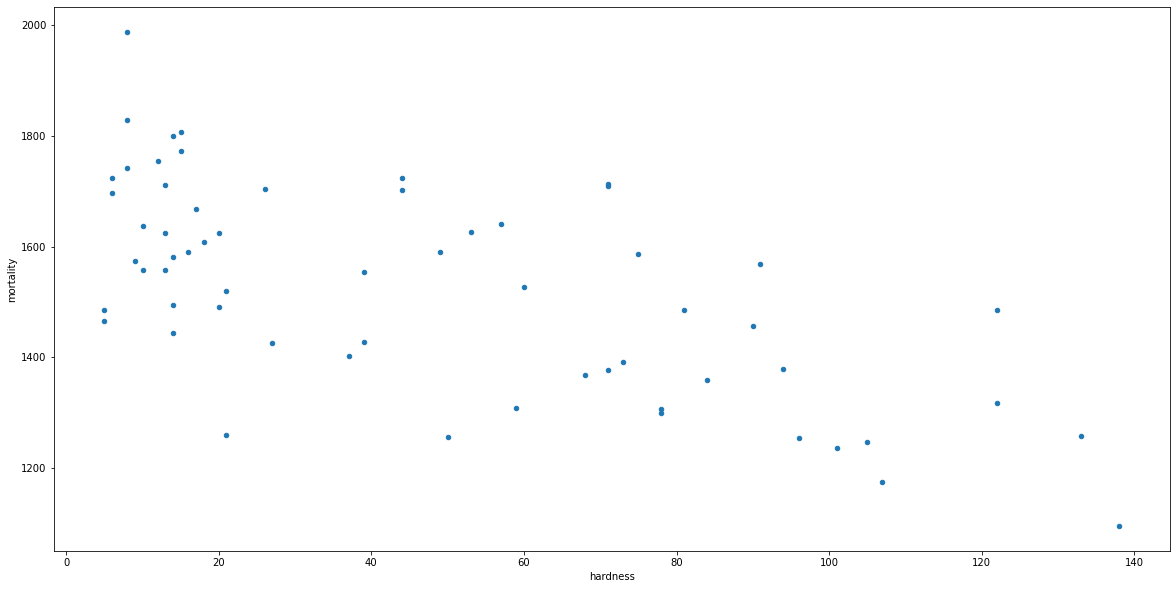

In [65]:
hardness.plot(kind='scatter', x='hardness', y='mortality')

In [66]:
#Корреляция Пирсона
hardness[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [67]:
#Корреляция Спирмена
hardness[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
X = hardness[['hardness']]
Y = hardness['mortality']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [85]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
model.coef_

array([-3.13167087])

In [73]:
model.intercept_

1668.9722977277095

In [74]:
y_pred = model.predict(x_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [86]:
#Коэффициент детерминации
model.score(x_test, y_test)

0.5046490611017092

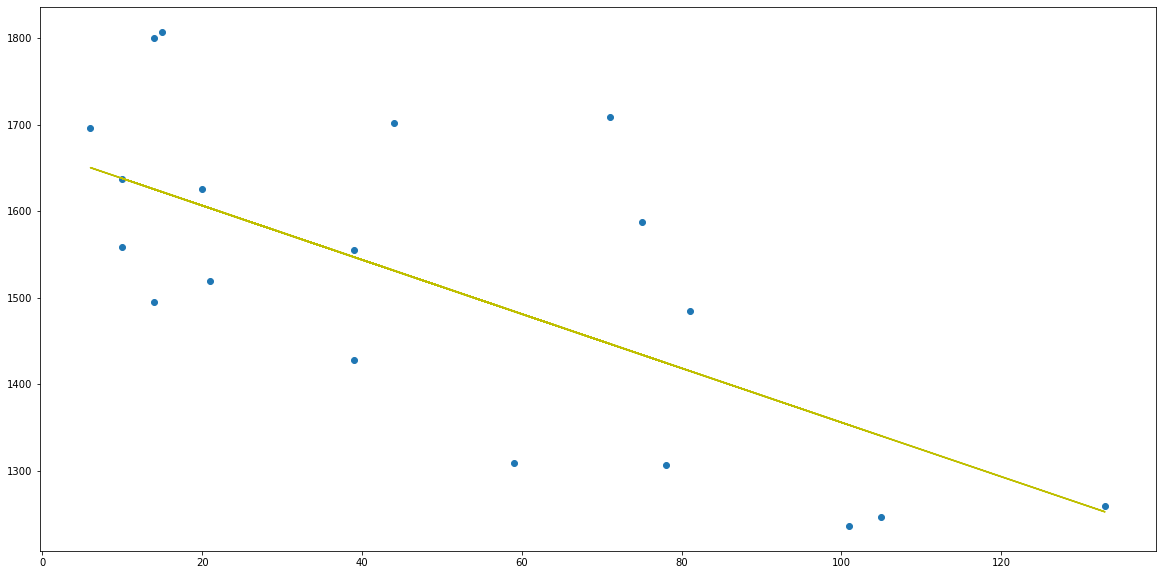

In [76]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='y')

In [77]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [79]:
x_const = sm.add_constant(x_train)

In [80]:
model = sm.OLS(y_train, x_const)
results = model.fit()

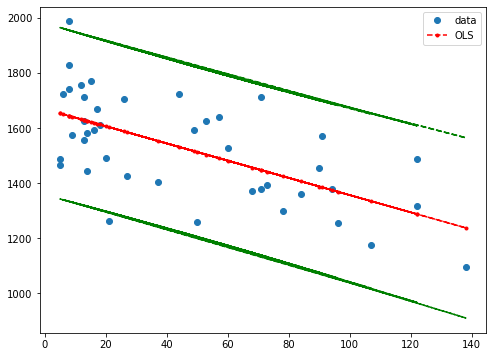

In [81]:
prstd, iv_l, iv_u = wls_prediction_std(results) 

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(x_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

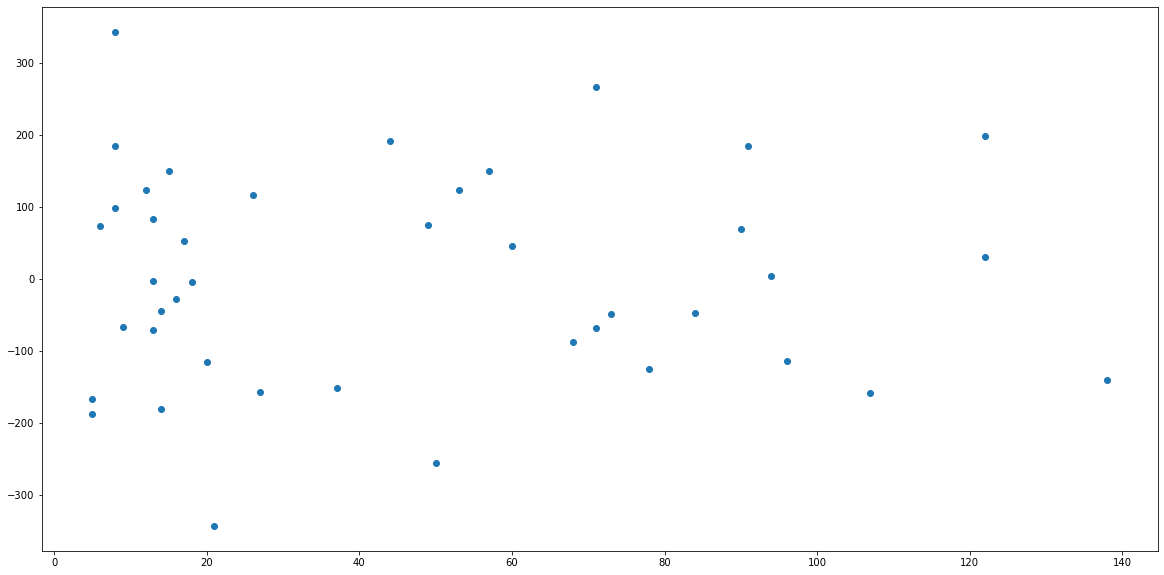

In [82]:
# посмотрим на остатки
plt.scatter(x_const.iloc[:, 1], results.resid)

Задание №2






In [25]:
south = hardness[hardness.location == 'South']
south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [26]:
north = hardness[hardness.location == 'North']
north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


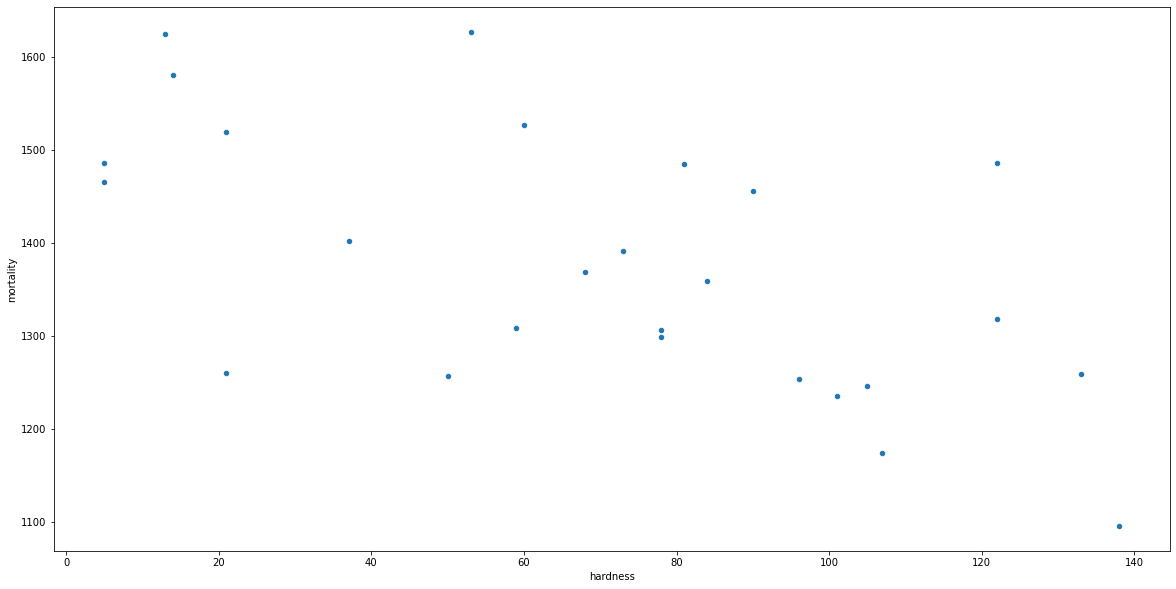

In [27]:
south.plot(kind='scatter', x='hardness', y='mortality')

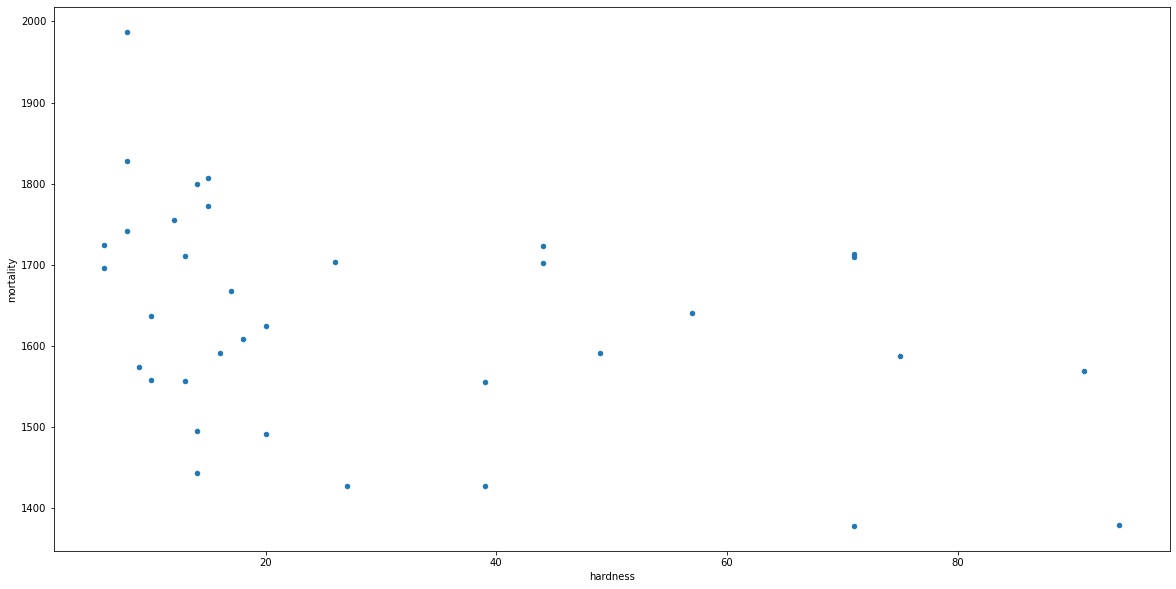

In [28]:
north.plot(kind='scatter', x='hardness', y='mortality')

In [29]:
#Корреляция Пирсона Юг
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [30]:
#Корреляция Пирсона Север
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [31]:
#Корреляция Спирмена Юг
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [32]:
#Корреляция Спирмена Север
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [44]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
XS = south[['hardness']]
YS = south['mortality']
XN = north[['hardness']]
YN = north['mortality']

In [46]:
xs_train, xs_test, ys_train, ys_test = train_test_split(XS, YS, test_size=0.30, random_state=42)
xn_train, xn_test, yn_train, yn_test = train_test_split(XN, YN, test_size=0.30, random_state=42)

In [47]:
xs_const = sm.add_constant(xs_train)
xn_const = sm.add_constant(xn_train)

In [51]:
modelS = sm.OLS(ys_train, xs_const)
resultsS = modelS.fit()

In [52]:
modelN = sm.OLS(yn_train, xn_const)
resultsN = modelN.fit()

In [92]:
modelSDet = LinearRegression()
modelSDet.fit(xs_train, ys_train)

LinearRegression()

In [93]:
modelNDet = LinearRegression()
modelNDet.fit(xn_train, yn_train)

LinearRegression()

In [96]:
#Коэффициент детерминации ЮГ
modelSDet.score(xs_test, ys_test)

-2.551922301235205

In [97]:
#Коэффициент детерминации Север
modelNDet.score(xn_test, yn_test)

0.018885304285745863

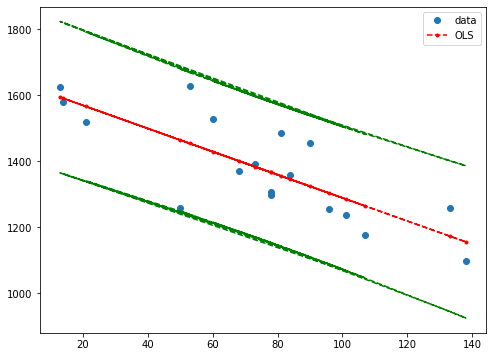

In [98]:
#Линейная регрессия Юг
prstd, iv_l, iv_u = wls_prediction_std(resultsS) 

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(xs_const.iloc[:, 1], ys_train, 'o', label="data")
ax.plot(xs_const.iloc[:, 1], resultsS.fittedvalues, 'r--.', label="OLS")
ax.plot(xs_const.iloc[:, 1], iv_u, 'g--')
ax.plot(xs_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

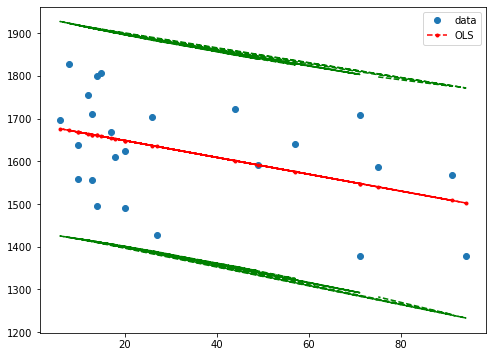

In [99]:
#Линейная регрессия Север
prstd, iv_l, iv_u = wls_prediction_std(resultsN) 

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(xn_const.iloc[:, 1], yn_train, 'o', label="data")
ax.plot(xn_const.iloc[:, 1], resultsN.fittedvalues, 'r--.', label="OLS")
ax.plot(xn_const.iloc[:, 1], iv_u, 'g--')
ax.plot(xn_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

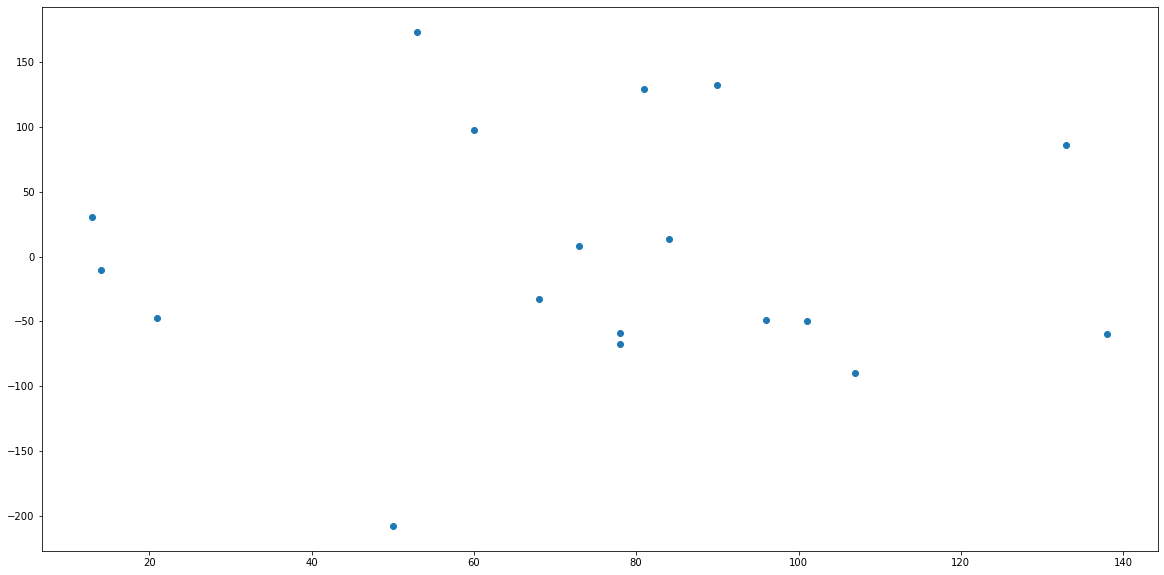

In [100]:
#остатки ЮГ
plt.scatter(xs_const.iloc[:, 1], resultsS.resid)

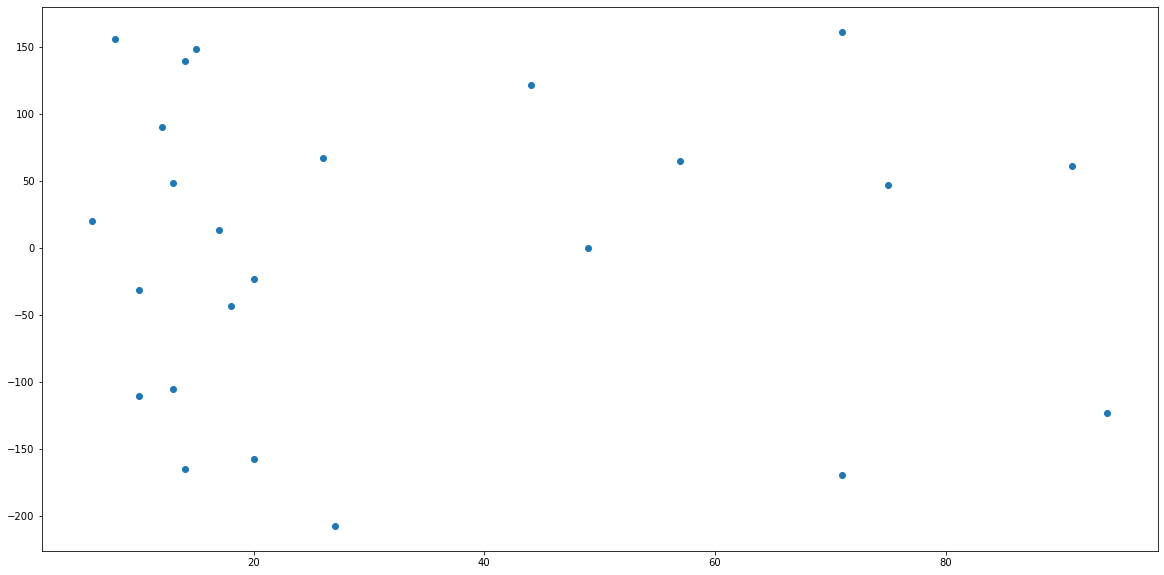

In [101]:
#остатки Север
plt.scatter(xn_const.iloc[:, 1], resultsN.resid)